# Run clouds over hits and store the output dataframe



### April 2021, JAH

In [1]:
#%matplotlib inline
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

#to_df = pd.DataFrame.from_records

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.histos       as histos

import clouds        as clouds
import pltclouds     as pltclouds

#import next.reco.chits    as chits
import next.reco.display  as nplay
import next.core.io       as nio

import next.reco.cloudsdia as cloudsdia
#import next.core.city     as ncity


In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Thu Apr 22 13:05:51 2021


### load data

In [5]:
def get_clouds_filename(run_number):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/clouds_ds_{run_number}.h5'
    return filename

def get_clouds_df(fname):
    return pd.read_hdf(fname, 'clouds')    


In [7]:
run_number = 8182
fname      = get_clouds_filename(run_number)
dfclouds   = get_clouds_df(fname)
nevents    = len(dfclouds.groupby('event'))
print(fname)
print('len ', len(dfclouds), 'number of events ', nevents)

/home/hernando/data/NEW/clouds_ds_8182.h5
len  1899479 number of events  2760


In [8]:
ievts = [i for i, evt in dfclouds.groupby('event')]

In [9]:
## bb: 2100, 2101, 2130, 2135
## b:  2108, 2115, 2134, 2140 
## 2-tracks: 2110
## ugly: 2102, 2103
## long: 2121
ii  = 2143
evt = dfclouds[dfclouds['event'] == ievts[ii]]

In [10]:
res = cloudsdia.ana_extremes(evt, depth = 1)
res

,id_ext,ene_ext,nsize_ext,x_ext,y_ext,z_ext,ecell_ext,nlength_ext,ipos_ext,idis_ext,i_ext,n_ext
0,449,0.378737,126,-75.0,-35.0,185.507927,0.035026,1,0,0,0,2
1,530,0.200604,93,-65.0,-65.0,225.507927,0.009641,7,6,0,1,2


{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': True, 'crests': True, 'crest': False}


<IPython.core.display.Javascript object>


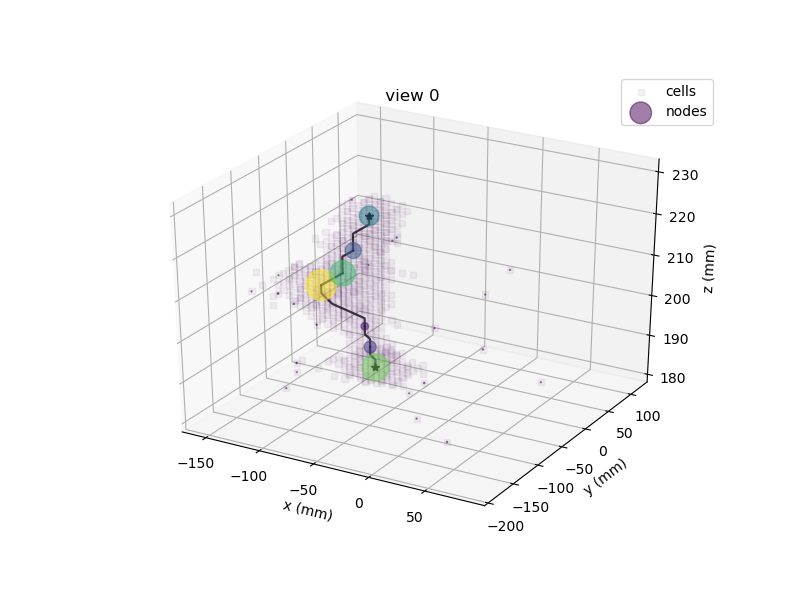

In [11]:
draw, plots = pltclouds.get_draw_clouds(evt)
plots['crest']  = False
plots['tracks'] = True
print(plots)
draw(plots)
plt.plot(res.x_ext, res.y_ext, res.z_ext, marker = '*', ls = ' ');